# C S 363D HW 2

## Feature engineering and linear regression

## Lauren Mangibin lgm977
## Fronrich Puno frp323

For this weeks homework we are going to load in a data set that isn't the "cleanest", repair it, do some analysis on the features, estimate a continuous parameter using linear regression, and experiment with trying a few different methods of feature selection.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data mining. 

In [1]:
import pandas as pd
## Add in all of your other imports here
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
## Load in the melb_data_sold_train.csv file here
df = pd.read_csv("melb_data_sold_train.csv")
df

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Hillside,22 Hillcrest Dr,6,h,935K,Prof.,17/06/2017,3037,6,4,2.0,694,NaN,NaN,Melton,-37.68178,144.73779,Western Metropolitan,5556
1,Taylors Lakes,18 Whiteley Pde,4,h,715K,Barry,17/06/2017,3038,4,3,2.0,679,NaN,NaN,Brimbank,-37.68903,144.77226,Western Metropolitan,5336
2,East Melbourne,496 Victoria Pde,4,h,1475K,Frank,18/06/2016,3002,2,1,1.0,179,NaN,NaN,Melbourne,-37.80990,144.98790,Northern Metropolitan,3040
3,Keilor East,32 Wyong St,3,h,825K,Nelson,10/12/16,3033,3,3,1.0,318,NaN,NaN,Moonee Valley,-37.73380,144.86620,Western Metropolitan,5629
4,Burwood,13 Elizabeth St,3,h,1325K,Buxton,24/06/2017,3125,3,1,1.0,756,NaN,NaN,Monash,-37.85683,145.09635,Southern Metropolitan,5678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,The Basin,5 Democrat Dr,3,h,700K,iTRAK,23/09/2017,3154,3,2,3.0,795,NaN,NaN,NaN,-37.85229,145.30281,Eastern Metropolitan,1690
7996,West Footscray,2a Hope St,2,h,705K,Jas,22/05/2016,3012,2,1,1.0,308,NaN,NaN,Maribyrnong,-37.79080,144.87170,Western Metropolitan,5058
7997,Wantirna South,16 Allanfield Cr,3,h,855K,Ray,22/07/2017,3152,3,1,2.0,730,NaN,NaN,Knox,-37.86288,145.25077,Eastern Metropolitan,7082
7998,Maidstone,29 Marsh St,3,h,815K,hockingstuart,17/09/2016,3012,3,1,2.0,0,NaN,NaN,Maribyrnong,-37.78100,144.88130,Western Metropolitan,3873


## Q1 Add a new feature
Toorak is known as one of the pricest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of (-37.841820, 145.015986) for the center of Toorak.  You may assume the Earth is spherical and has radius of 6371.0088km (the first property in the data frame (-37.68178,144.73779) is approx 30 km away)

In [2]:
def DistToToorak(dataFrame):
    circum = 6371.0088

    # iterate
    for index, row in dataFrame.iterrows():
        # center of toorak
        lat_toorak = radians(-37.841820)
        lon_toorak = radians(145.015986)

        # current row lat/long
        lat_row = radians(dataFrame.loc[index, 'Lattitude'])
        lon_row = radians(dataFrame.loc[index, 'Longtitude'])

        # calculations
        dlon = lon_row - lon_toorak
        dlat = lat_row - lat_toorak
        a = sin(dlat / 2)**2 + cos(lat_toorak) * cos(lat_row) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        # append new column 'DistFromToorak
        dataFrame.loc[index, 'DistFromToorak'] = circum * c
    return dataFrame

In [3]:
#deep copy to avoid duplicates
df_deep = df.copy()
df_deep = DistToToorak(df_deep)
df_deep

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DistFromToorak
0,Hillside,22 Hillcrest Dr,6,h,935K,Prof.,17/06/2017,3037,6,4,2.0,694,NaN,NaN,Melton,-37.68178,144.73779,Western Metropolitan,5556,30.244773
1,Taylors Lakes,18 Whiteley Pde,4,h,715K,Barry,17/06/2017,3038,4,3,2.0,679,NaN,NaN,Brimbank,-37.68903,144.77226,Western Metropolitan,5336,27.342909
2,East Melbourne,496 Victoria Pde,4,h,1475K,Frank,18/06/2016,3002,2,1,1.0,179,NaN,NaN,Melbourne,-37.80990,144.98790,Northern Metropolitan,3040,4.322385
3,Keilor East,32 Wyong St,3,h,825K,Nelson,10/12/16,3033,3,3,1.0,318,NaN,NaN,Moonee Valley,-37.73380,144.86620,Western Metropolitan,5629,17.819211
4,Burwood,13 Elizabeth St,3,h,1325K,Buxton,24/06/2017,3125,3,1,1.0,756,NaN,NaN,Monash,-37.85683,145.09635,Southern Metropolitan,5678,7.250879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,The Basin,5 Democrat Dr,3,h,700K,iTRAK,23/09/2017,3154,3,2,3.0,795,NaN,NaN,NaN,-37.85229,145.30281,Eastern Metropolitan,1690,25.211566
7996,West Footscray,2a Hope St,2,h,705K,Jas,22/05/2016,3012,2,1,1.0,308,NaN,NaN,Maribyrnong,-37.79080,144.87170,Western Metropolitan,5058,13.886119
7997,Wantirna South,16 Allanfield Cr,3,h,855K,Ray,22/07/2017,3152,3,1,2.0,730,NaN,NaN,Knox,-37.86288,145.25077,Eastern Metropolitan,7082,20.746393
7998,Maidstone,29 Marsh St,3,h,815K,hockingstuart,17/09/2016,3012,3,1,2.0,0,NaN,NaN,Maribyrnong,-37.78100,144.88130,Western Metropolitan,3873,13.628264


## Q2 Fix a column
It looks like the data scraper that crawled this data sometimes captured the price with a 'K' indicating thousand. Correct it.   (935K should become 935000.0, and the column data type should be float64)

In [4]:
#Regex to find K and replace with 000 and then convert to float? (find a function that does this online)
def fixPrice(dataFrame):
    dataFrame.Price = dataFrame.Price.replace({'K': '000'}, regex=True).astype('float')
    return dataFrame

In [5]:
df_deep = fixPrice(df_deep)
df_deep

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DistFromToorak
0,Hillside,22 Hillcrest Dr,6,h,935000.0,Prof.,17/06/2017,3037,6,4,2.0,694,NaN,NaN,Melton,-37.68178,144.73779,Western Metropolitan,5556,30.244773
1,Taylors Lakes,18 Whiteley Pde,4,h,715000.0,Barry,17/06/2017,3038,4,3,2.0,679,NaN,NaN,Brimbank,-37.68903,144.77226,Western Metropolitan,5336,27.342909
2,East Melbourne,496 Victoria Pde,4,h,1475000.0,Frank,18/06/2016,3002,2,1,1.0,179,NaN,NaN,Melbourne,-37.80990,144.98790,Northern Metropolitan,3040,4.322385
3,Keilor East,32 Wyong St,3,h,825000.0,Nelson,10/12/16,3033,3,3,1.0,318,NaN,NaN,Moonee Valley,-37.73380,144.86620,Western Metropolitan,5629,17.819211
4,Burwood,13 Elizabeth St,3,h,1325000.0,Buxton,24/06/2017,3125,3,1,1.0,756,NaN,NaN,Monash,-37.85683,145.09635,Southern Metropolitan,5678,7.250879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,The Basin,5 Democrat Dr,3,h,700000.0,iTRAK,23/09/2017,3154,3,2,3.0,795,NaN,NaN,NaN,-37.85229,145.30281,Eastern Metropolitan,1690,25.211566
7996,West Footscray,2a Hope St,2,h,705000.0,Jas,22/05/2016,3012,2,1,1.0,308,NaN,NaN,Maribyrnong,-37.79080,144.87170,Western Metropolitan,5058,13.886119
7997,Wantirna South,16 Allanfield Cr,3,h,855000.0,Ray,22/07/2017,3152,3,1,2.0,730,NaN,NaN,Knox,-37.86288,145.25077,Eastern Metropolitan,7082,20.746393
7998,Maidstone,29 Marsh St,3,h,815000.0,hockingstuart,17/09/2016,3012,3,1,2.0,0,NaN,NaN,Maribyrnong,-37.78100,144.88130,Western Metropolitan,3873,13.628264


## Q3 Create a one hot encoding for the categorical column 'Type'
Make sure the new columns are merged into the dataframe you are carrying through to the prediction step

In [6]:
def oneHotEncoding(dataFrame):
    types = pd.get_dummies(dataFrame.Type)
    dataFrame = pd.concat([dataFrame, types], axis=1)
    return dataFrame

In [7]:
df_deep = oneHotEncoding(df_deep)
df_deep

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DistFromToorak,h,t,u
0,Hillside,22 Hillcrest Dr,6,h,935000.0,Prof.,17/06/2017,3037,6,4,...,NaN,Melton,-37.68178,144.73779,Western Metropolitan,5556,30.244773,1,0,0
1,Taylors Lakes,18 Whiteley Pde,4,h,715000.0,Barry,17/06/2017,3038,4,3,...,NaN,Brimbank,-37.68903,144.77226,Western Metropolitan,5336,27.342909,1,0,0
2,East Melbourne,496 Victoria Pde,4,h,1475000.0,Frank,18/06/2016,3002,2,1,...,NaN,Melbourne,-37.80990,144.98790,Northern Metropolitan,3040,4.322385,1,0,0
3,Keilor East,32 Wyong St,3,h,825000.0,Nelson,10/12/16,3033,3,3,...,NaN,Moonee Valley,-37.73380,144.86620,Western Metropolitan,5629,17.819211,1,0,0
4,Burwood,13 Elizabeth St,3,h,1325000.0,Buxton,24/06/2017,3125,3,1,...,NaN,Monash,-37.85683,145.09635,Southern Metropolitan,5678,7.250879,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,The Basin,5 Democrat Dr,3,h,700000.0,iTRAK,23/09/2017,3154,3,2,...,NaN,NaN,-37.85229,145.30281,Eastern Metropolitan,1690,25.211566,1,0,0
7996,West Footscray,2a Hope St,2,h,705000.0,Jas,22/05/2016,3012,2,1,...,NaN,Maribyrnong,-37.79080,144.87170,Western Metropolitan,5058,13.886119,1,0,0
7997,Wantirna South,16 Allanfield Cr,3,h,855000.0,Ray,22/07/2017,3152,3,1,...,NaN,Knox,-37.86288,145.25077,Eastern Metropolitan,7082,20.746393,1,0,0
7998,Maidstone,29 Marsh St,3,h,815000.0,hockingstuart,17/09/2016,3012,3,1,...,NaN,Maribyrnong,-37.78100,144.88130,Western Metropolitan,3873,13.628264,1,0,0


## Q4 Create a box and whisker plot for the Landsize for select suburbs
Show the difference between these three suburbs:
  - Reservoir
  - Richmond
  - Bentleigh East

In [8]:
#Change Landsize to float
def fixLandsize(dataFrame):
    dataFrame.Landsize = dataFrame.Landsize.replace({'K': '000'}, regex=True).astype('float')
    return dataFrame

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f8cd819a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f8cd652e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f8cd6f910>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1f8cd659a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f8cd65ca0>,
 'means': []}

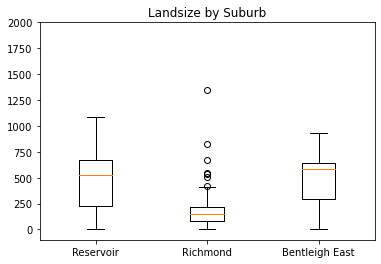

In [9]:
df_deep = fixLandsize(df_deep)
#Limit/filter df to Reservoir, Richmond, Bentleigh East
reservoir = df_deep[df_deep["Suburb"]=="Reservoir"].Landsize
richmond = df_deep[df_deep["Suburb"]=="Richmond"].Landsize
bentleigh_east = df_deep[df_deep["Suburb"]=="Bentleigh East"].Landsize

#plot
fig, ax = plt.subplots()
ax.set_title('Landsize by Suburb')
plt.ylim(-100,2000)
ax.set_xticklabels(['Reservoir', 'Richmond', 'Bentleigh East'])
ax.boxplot([reservoir, richmond, bentleigh_east])

In [10]:
# df_suburbs = df_deep.loc[(df_deep["Suburb"]=="Bentleigh East") | (df_deep["Suburb"]=="Richmond") | (df_deep["Suburb"]=="Reservoir")]

# boxplot = df_suburbs.boxplot(['Landsize'], by='Surburb')

# boxplot.plot()
# use matplotlib to create box and whisker plot for landsize of each suburb

# fig1,ax1 = plt.subplots(1,3)
# ax1.set_title('Reservoir (Zoomed In)')
# plt.ylim(0,2000)
# ax1.boxplot(reservoir)

# fig2,ax2 = plt.subplots()
# ax2.set_title('Richmond')
# plt.ylim(0,2000)
# ax2.boxplot(richmond)

# fig3,ax3 = plt.subplots()
# plt.ylim(0,2000)
# ax3.set_title('Bentleigh East')
# ax3.boxplot(bentleigh_east)


# fig, axs = plt.subplots(1, 3)


# # basic plot
# axs[0].boxplot(reservoir)
# plt.ylim(0,2000)
# axs[0].set_title('Reservoir')

# # notched plot
# axs[1].boxplot(richmond)
# plt.ylim(0,2000)
# axs[1].set_title('Richmond')

# # change outlier point symbols
# axs[2].boxplot(bentleigh_east)
# plt.ylim(0,2000)
# axs[2].set_title('Bentleigh East')


## Q5 Calculate the correlations between all of your continuous value predictors
Use the Pearson correlation as discussed in the lectures. 

In [11]:
df_continuous = df_deep[['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'Propertycount', 'DistFromToorak', 'h', 't', 'u']].dropna()
corr = df_continuous.corr()
print(corr)

                   Rooms     Price  Bedroom2  Bathroom       Car  Landsize  \
Rooms           1.000000  0.463966  0.950200  0.594287  0.397102  0.090159   
Price           0.463966  1.000000  0.445058  0.430559  0.202959  0.046278   
Bedroom2        0.950200  0.445058  1.000000  0.590325  0.401512  0.089500   
Bathroom        0.594287  0.430559  0.590325  1.000000  0.322307  0.073027   
Car             0.397102  0.202959  0.401512  0.322307  1.000000  0.112552   
Landsize        0.090159  0.046278  0.089500  0.073027  0.112552  1.000000   
BuildingArea    0.103023  0.064086  0.102292  0.096747  0.094768  0.565898   
Propertycount  -0.083545 -0.058107 -0.076637 -0.058404 -0.024809 -0.036327   
DistFromToorak  0.257424 -0.367169  0.267066  0.078920  0.212829  0.118607   
h               0.488063  0.362049  0.474048  0.171499  0.215004  0.043413   
t              -0.051221 -0.090401 -0.047499  0.109153 -0.015539 -0.054638   
u              -0.520371 -0.347158 -0.507098 -0.277135 -0.234446

In [12]:
#In class..
# df_deep_merged.head(5)
# print(df_deep_merged.dtypes)

# df_dropped = df_deep_merged.select_dtypes(exclude=['object'])
# df_continuous = df_deep[['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'Propertycount', 'DistFromToorak', 'Postcode']]
# corr = df_continuous.corr()
# print(corr)

# .drop(['Type__h',"Suburb", "Address","Type", "SellerG", "Postcode",
#                      'CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'], axis=1)
# corr = np.corrcoef(df_continuous.apply(pd.to_numeric).dropna())


# print(corr)

# df_deep_merged.dtypes

# # # convert Landsize to ints
# # df_deep_merged.Landsize = df_deep_merged.Landsize.replace({'K': '000'}).astype(imt)
# # df_deep_merged['YearBuilt'] = df_deep_merged['YearBuilt'].astype(float)
# df_deep_merged.dtypes

# # df_deep_merged
# # # remove objects
# # # df_deep_corr = df_deep_merged.select_dtypes(exclude=['object'])
# # # dp_no_housing = df_deep_corr.drop(['Type__h'], axis = 1)
# # # dp_no_housing

#landsize, yearbuilt

## Q6 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric predictor columns we selected in the last question, and the home value as are the value you are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

In [13]:
def betaHat(x):
    #Add intercept column
    intercept =  pd.Series(np.ones(len(x)), name="Intercept")
    x = pd.concat([intercept,x],axis=1)

    x = x.dropna()
    y = x.Price.to_numpy()
    x = x.drop('Price', 1).to_numpy()
    x_t = x.transpose()

    #Calculate beta_hat
    inv = np.linalg.inv(np.matmul(x_t, x))
    temp = np.matmul(inv, x_t)
    b_hat = np.matmul(temp, y)
    
    return x, b_hat, y

In [14]:
# instead of deleting NaN, average
def betaHatAvg(x):
    #Add intercept column
    intercept =  pd.Series(np.ones(len(x)), name="Intercept")
    x = pd.concat([intercept,x],axis=1)

    # x = x.dropna()
    # instead of dropping nan average
    x[x.columns] = x[x.columns].fillna(value=x[x.columns].mean())
    y = x.Price.to_numpy()
    x = x.drop('Price', 1).to_numpy()
    x_t = x.transpose()

    #Calculate beta_hat
    inv = np.linalg.inv(np.matmul(x_t, x))
    temp = np.matmul(inv, x_t)
    b_hat = np.matmul(temp, y)
    
    return x, b_hat, y

In [15]:
x = df_deep[['Rooms','Price','Bedroom2', 'Bathroom', 'Car', 'Landsize',
                    'BuildingArea', 'Propertycount', 'DistFromToorak', 'Postcode',
                    'Lattitude', 'Longtitude', 'h', 't', 'u']]

x, beta_hat, y = betaHat(x)
beta_hat

array([ 1.89671048e+11,  6.96396891e+06,  1.15759009e+07,  2.34720590e+06,
        9.26168384e+06, -5.62947916e+02, -1.15062033e+04,  5.04818326e+02,
       -7.35769202e+06,  6.97644464e+05,  2.52623441e+08, -1.25532341e+09,
       -2.58538321e+08, -2.49419982e+08, -2.55575134e+08])

## Q7 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the matrix you calculated in the last step to predict the housing prices for data in that file.  Create a visualization that shows the error in your predictions (hint:remember to do all your data pre-processing on the new file!).  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient. 

In [16]:
#Preprocess data
df_test = pd.read_csv("melb_data_sold_test.csv")
df_copy = df_test.copy()

df_copy = DistToToorak(df_copy)
df_copy = fixPrice(df_copy)
df_copy = oneHotEncoding(df_copy)
df_copy

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DistFromToorak,h,t,u
0,Avondale Heights,105 Canning St,3,h,848000.0,Nelson,4/3/17,3034,3,1,...,NaN,Moonee Valley,-37.77060,144.86290,Western Metropolitan,4502,15.607585,1,0,0
1,Pascoe Vale,16/43 Arndt Rd,2,u,541000.0,Nelson,29/07/2017,3044,2,1,...,NaN,Moreland,-37.72136,144.92932,Northern Metropolitan,7485,15.408604,0,0,1
2,Balwyn North,16 Riverview Rd,3,h,1890000.0,Fletchers,19/08/2017,3104,3,2,...,1940,NaN,-37.79094,145.07899,Southern Metropolitan,7809,7.914414,1,0,0
3,Altona Meadows,52 Spicer Bvd,4,h,750000.0,YPA,23/09/2017,3028,4,2,...,1996,NaN,-37.87941,144.76935,Western Metropolitan,7630,22.051728,1,0,0
4,South Yarra,20 Fawkner St,2,h,2430000.0,Biggin,10/12/16,3141,2,1,...,1985,Stonnington,-37.84200,144.98730,Southern Metropolitan,14887,2.519039,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Brunswick,60 Rose St,3,h,947000.0,Woodards,28/05/2016,3056,3,1,...,NaN,Moreland,-37.75640,144.95270,Northern Metropolitan,11918,11.006184,1,0,0
1017,Heidelberg,29 Martin St,3,h,1271000.0,Fletchers,22/04/2017,3084,3,2,...,2008,Banyule,-37.75240,145.06000,Eastern Metropolitan,2890,10.668663,1,0,0
1018,Braybrook,9 Middleton St,3,h,834500.0,S&L,9/9/17,3019,3,1,...,NaN,NaN,-37.78481,144.86230,Western Metropolitan,3589,14.914847,1,0,0
1019,Reservoir,41 Cameron St,3,h,998000.0,Nelson,7/11/16,3073,3,2,...,1950,Darebin,-37.72710,144.99680,Northern Metropolitan,21650,12.867245,1,0,0


60675


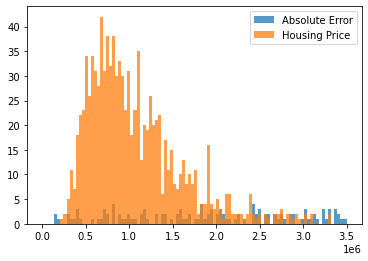

In [17]:
# here you load melb_data_sold_test.csv
#using same regresion model on new data
y_hat = np.matmul(x,beta_hat)

abs_error = np.absolute(np.subtract(y_hat, y))

print(x.size)
#visualize a histogram of abs error vs total housing price
plt.hist(abs_error, label='Absolute Error', alpha=0.75, bins=100, range=(0,3500000))
plt.hist(df_copy['Price'], label='Housing Price', alpha=0.75, bins=100, range=(0,3500000)) 
plt.legend(loc='upper right')
plt.show()

## Q8 Iterate!
We tried one way of creating a feature vector, now try experimenting with something else and see if you can improve your results.  Normalizing data features, creating data features, etc! Have some fun with it. Visualize the improvement you made to your first attempt and give some prose in a markdown cell about different things your tried.

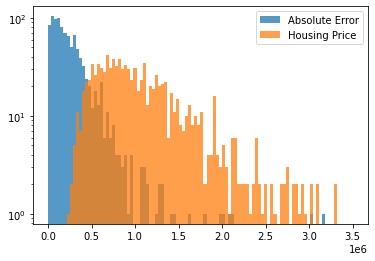

In [41]:
#do it again with different thingies
#try normalizing it!
#visualize and summarize in a markdown

# restricted to numeric
# x = df_deep[['Rooms','Price','Bedroom2', 'Bathroom', 'Car', 'Landsize',
#                     'BuildingArea', 'Propertycount', 'DistFromToorak', 'Postcode', 'h']]

x = df_copy[['Rooms','Price','Bedroom2', 'Bathroom', 'Car', 'Landsize',
                    'BuildingArea', 'Propertycount', 'DistFromToorak', 'Postcode',
                    'Lattitude', 'Longtitude', 'h']]

# one-liner beta_hat
# dropped price in beta_hat calc
x, beta_hat_avg, y = betaHatAvg(x)

new_y_hat = np.matmul(x,beta_hat_avg)

abs_error = np.absolute(np.subtract(new_y_hat, y))


# visualize a histogram of abs error vs total housing price
# added density
plt.hist(abs_error, label='Absolute Error', alpha=0.75, bins=100, range=(0,3500000))
plt.hist(df_copy['Price'], label='Housing Price', alpha=0.75, bins=100, range=(0,3500000))
plt.legend(loc='upper right')
# log scale
plt.yscale('log')
plt.show()

For question 8, we went excluded the one-hot ecodings from our calculation of beta_hat. In doing so, we were able to get a better absolute error, which in comparison to the previous absolute error is largly skewed left and intercepts less with the actual housing price. This was most likley due to the columns 'h', 't', and 'u' not becing significant to the predicition. They actually had an adverse affect by adding noise. Secondly, in order to better distinguish smaller differences in housing price, we used a logarithmic y scale.